# 3. Detection algorithm: Weight Statistics
... Implementation in numpy

Author: Javier Sales-Ortiz

Important errata: Examples must have 4 or more agents. Otherwise it doesn't work

Date: Nov, 2022

CMPUT 644 Final project

In [3]:
import numpy as np
from partition import *
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

## Questions

* Are the distances calculated with biases or only the weights? Both, treat all parameters the same
* Do it on the weights, not on the updates. But at the end of the dat it can be itnerchangeable

In [24]:
#w1 = np.random.normal(loc =(0,0), scale = 1.0, size=(30, 2)).T
#w2 = np.random.normal(loc =(2,2), scale = 1.0, size=(30, 2)).T
#w3 = np.random.normal(loc =(-2,2), scale = 1.0, size=(30, 2)).T
#w4 = np.random.normal(loc =(10,10), scale = 1.0, size=(30, 2)).T
w1 = np.array([0.5,0.5])
w2 = np.array([1,0.6])
w3 = np.array([0.8,1.2])
#w4 = np.array([0.2,0.2])
#w5 = np.array([0.2,0.4])
#w6 = np.array([0.3,1])
#w7 = np.array([1,0.3])
#w8 = np.array([0.4,0.2])
#w9 = np.array([1,0.5])
w4 = np.array([4,4])
WL = [w1, w2, w3, w4]#, w5, w6, w7, w8, w9, w10]
print(w1.shape, w2.shape)


(2,) (2,)


Text(0, 0.5, 'x2')

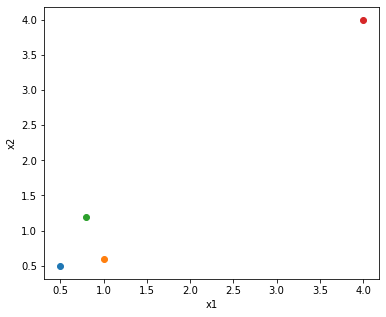

In [25]:
fig1 = plt.figure(figsize=(6,5))
ax1 = fig1.add_subplot(1,1,1)

for w in WL:
    ax1.scatter(w[0], w[1])
    
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

1. For the malicious agent we compute:

$R_m = [\min_{i \in [k] \backslash m} d(\mathbb{\delta}_m^t, \mathbb{\delta}_i^t), \max_{i \in [k] \backslash m} d(\mathbb{\delta}_m^t, \mathbb{\delta}_i^t)]$

2. Define values:

$R_{\min,[k] \backslash m}^l$ The minimum lower bound of the range for all other agents

$R_{\max,[k] \backslash m}^u$ The maximum upper bound of the range for all other agents

3. For the malicious agent not to be flagged, we need:

$\max \{|R_m^u-R_{min, [k] \backslash m}^l|, |R_{m}^l - R_{max, [k]\backslash m}^u| \} < \kappa_t$

I have observed that 3. doesn't work, so my proposed fix is:

$\max \{|R_m^l-R_{min, [k] \backslash m}^l|, |R_{m}^u - R_{max, [k]\backslash m}^u| \} < \kappa_t$

In [9]:
weight_update_statistics(WL, fix= True, debug=True)

[[   nan 0.7071 0.5831 4.9497]
 [0.7071    nan 0.8    4.2426]
 [0.5831 0.8       nan 4.8415]
 [4.9497 4.2426 4.8415    nan]]
Agent 0: Rm [0.58, 4.95], R_k\m [0.80, 4.84], [|R(l,m)-R(l,k\m)|, |R(u,m)-R(u,k\m)|] = 0.22, 0.11; max 0.22
Agent 1: Rm [0.71, 4.24], R_k\m [0.58, 4.95], [|R(l,m)-R(l,k\m)|, |R(u,m)-R(u,k\m)|] = 0.12, 0.71; max 0.71
Agent 2: Rm [0.58, 4.84], R_k\m [0.71, 4.95], [|R(l,m)-R(l,k\m)|, |R(u,m)-R(u,k\m)|] = 0.12, 0.11; max 0.12
Agent 3: Rm [4.24, 4.95], R_k\m [0.58, 0.80], [|R(l,m)-R(l,k\m)|, |R(u,m)-R(u,k\m)|] = 3.66, 4.15; max 4.15


array([0., 0., 0., 1.])